In [1]:
import torch
from torch.nn import functional as F
from makemore_helper import *
import matplotlib.pyplot as plt
%matplotlib inline
import random


Paper : https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [23]:
def get_names_list_v2():
    with open("names_indian.txt", 'r') as f:
        return f.read().splitlines()
words = get_names_list_v2()
random.seed(42)
random.shuffle(words)

In [24]:
set(''.join(words))

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [25]:
sorted_chars = sorted(list(set(''.join(words))))
num_classes = len(sorted_chars) + 1 # one extra for '.'

In [26]:
block_size=3
xs, ys = get_ngram_dataset(words=words,block_size=block_size)

In [27]:
xs.shape,ys.shape

(torch.Size([47632, 3]), torch.Size([47632]))

In [28]:
#visualising
example_ct = 32
for xi, yi in zip(xs[:example_ct], ys[:example_ct]):
    chsi = ''.join([default_itos[ix.item()] for ix in xi])
    chy = default_itos[yi.item()]
    print(f'{chsi} --- {chy}')


... --- v
..v --- i
.vi --- k
vik --- s
iks --- h
ksh --- i
shi --- .
... --- r
..r --- a
.ra --- j
raj --- u
aju --- d
jud --- i
udi --- .
... --- b
..b --- i
.bi --- s
bis --- h
ish --- e
she --- s
hes --- h
esh --- .
... --- r
..r --- a
.ra --- h
rah --- m
ahm --- a
hma --- t
mat --- .
... --- s
..s --- u
.su --- h


In [29]:
xs_train, ys_train, xs_val, ys_val, xs_test, ys_test = train_val_test_split(xs, ys, 80, 10)
xs_train.shape, ys_train.shape, xs_val.shape, ys_val.shape, xs_test.shape, ys_test.shape

(torch.Size([38105, 3]),
 torch.Size([38105]),
 torch.Size([4763, 3]),
 torch.Size([4763]),
 torch.Size([4764, 3]),
 torch.Size([4764]))

In [30]:
embeding_size = 2

In [31]:
C = torch.randn((num_classes, embeding_size))

In [32]:
C[5]

tensor([-1.3646, -0.0647])

In [33]:
F.one_hot(torch.tensor(5), num_classes=num_classes).float() @ C

tensor([-1.3646, -0.0647])

In [34]:
emb = C[xs_train]
emb.shape

torch.Size([38105, 3, 2])

In [35]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [14]:
h = torch.tanh(emb.view(-1 , block_size *embeding_size) @ W1 + b1)

In [15]:
h.shape

torch.Size([182516, 100])

In [16]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [17]:
logits = h @ W2 + b2
logits

tensor([[ 3.9897, -0.6666,  7.7388,  ...,  6.9503, 19.0372,  2.7772],
        [ 6.1732, -1.0422,  6.4571,  ...,  7.6821, 16.4880,  3.1514],
        [13.8122, -3.2323,  4.8819,  ..., -6.7591,  6.6428, -0.5188],
        ...,
        [14.4605,  3.0854, -5.8450,  ...,  1.3034, -0.7122, -0.3546],
        [ 3.9897, -0.6666,  7.7388,  ...,  6.9503, 19.0372,  2.7772],
        [17.7444, -4.8226, -2.5227,  ..., -3.1784,  3.8128,  7.3156]])

In [18]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
counts

tensor([[5.4041e+01, 5.1348e-01, 2.2958e+03,  ..., 1.0435e+03, 1.8525e+08,
         1.6073e+01],
        [4.7974e+02, 3.5267e-01, 6.3721e+02,  ..., 2.1693e+03, 1.4475e+07,
         2.3368e+01],
        [9.9666e+05, 3.9467e-02, 1.3188e+02,  ..., 1.1602e-03, 7.6723e+02,
         5.9526e-01],
        ...,
        [1.9060e+06, 2.1877e+01, 2.8944e-03,  ..., 3.6819e+00, 4.9056e-01,
         7.0147e-01],
        [5.4041e+01, 5.1348e-01, 2.2958e+03,  ..., 1.0435e+03, 1.8525e+08,
         1.6073e+01],
        [5.0853e+07, 8.0460e-03, 8.0241e-02,  ..., 4.1653e-02, 4.5275e+01,
         1.5035e+03]])

In [19]:
prob

tensor([[2.9160e-07, 2.7707e-09, 1.2388e-05,  ..., 5.6307e-06, 9.9961e-01,
         8.6730e-08],
        [3.3000e-05, 2.4259e-08, 4.3833e-05,  ..., 1.4922e-04, 9.9574e-01,
         1.6075e-06],
        [9.5773e-01, 3.7926e-08, 1.2673e-04,  ..., 1.1149e-09, 7.3726e-04,
         5.7201e-07],
        ...,
        [9.9942e-01, 1.1471e-05, 1.5177e-09,  ..., 1.9306e-06, 2.5723e-07,
         3.6783e-07],
        [2.9160e-07, 2.7707e-09, 1.2388e-05,  ..., 5.6307e-06, 9.9961e-01,
         8.6730e-08],
        [3.4406e-01, 5.4438e-11, 5.4290e-10,  ..., 2.8182e-10, 3.0632e-07,
         1.0173e-05]])

In [20]:
ypred = prob[torch.arange(prob.shape[0]), ys_train]
ypred

tensor([9.9961e-01, 1.1944e-10, 3.6731e-10,  ..., 9.9942e-01, 1.6435e-09,
        9.0968e-08])

In [21]:
loss = -ypred.log().mean()
loss

tensor(17.4782)

In [36]:
# Everything above combined
g = torch.Generator().manual_seed(2147483647)

h_n_ct = 300 # hidden layer neuron count
embeding_size = 10

C = torch.randn((num_classes, embeding_size), generator=g)
W1 = torch.randn((block_size*embeding_size, h_n_ct), generator=g)
b1 = torch.randn(h_n_ct, generator=g)
W2 = torch.randn((h_n_ct, num_classes), generator=g)
b2 = torch.randn(num_classes, generator=g)
parameters = [C, W1, b1, W2, b2]

In [37]:
sum(p.nelement() for p in parameters) # total parameteres

17697

In [38]:
for p in parameters:
    p.requires_grad = True

In [39]:
batch_size = 32
stepi = []
lossi = []
steps = 0

In [40]:
for i in range(200000):
    #mini batch
    ix = torch.randint(0, xs_train.shape[0], (batch_size,))
    
    # forward pass
    emb = C[xs_train[ix]]
    h = torch.tanh(emb.view(-1 , block_size*embeding_size) @ W1 + b1)
    logits = h @ W2 + b2
    # logits = logits - logits.max()
    # counts = logits.exp() 
    # prob = counts / counts.sum(1, keepdim=True)
    # ypred = prob[torch.arange(prob.shape[0]), ys_train]
    # loss = ypred.log().mean()
    loss = F.cross_entropy(logits, ys_train[ix])
    stepi.append(steps)
    lossi.append(loss.item())
    steps += 1
    if i % 10000 == 0:
        print(f'{i=}, {loss.item()=}')
    # backward_pass
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
loss.item()

i=0, loss.item()=36.123085021972656
i=10000, loss.item()=2.510451078414917
i=20000, loss.item()=2.2418603897094727
i=30000, loss.item()=2.500767469406128
i=40000, loss.item()=1.9915679693222046
i=50000, loss.item()=2.0505335330963135
i=60000, loss.item()=2.231555700302124
i=70000, loss.item()=1.7683172225952148
i=80000, loss.item()=2.068373680114746
i=90000, loss.item()=2.1536903381347656
i=100000, loss.item()=2.1851141452789307
i=110000, loss.item()=1.6675817966461182
i=120000, loss.item()=1.8439147472381592
i=130000, loss.item()=1.8601396083831787
i=140000, loss.item()=2.049135684967041
i=150000, loss.item()=1.8049770593643188
i=160000, loss.item()=1.699116587638855
i=170000, loss.item()=1.7188748121261597
i=180000, loss.item()=1.675049066543579
i=190000, loss.item()=1.9849166870117188


1.6102068424224854

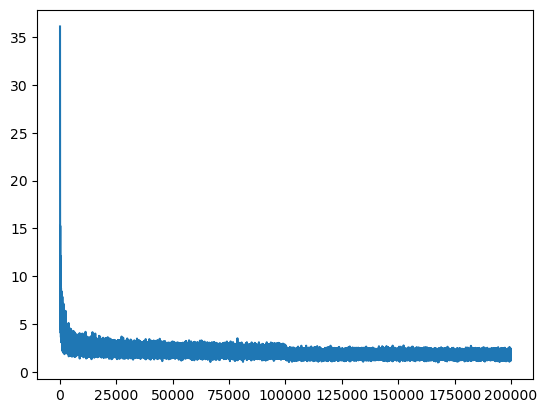

In [41]:
plt.plot(stepi, lossi)

In [42]:
emb = C[xs_val]
h = torch.tanh(emb.view(-1 , block_size*embeding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, ys_val)
loss

tensor(2.3336, grad_fn=<NllLossBackward0>)

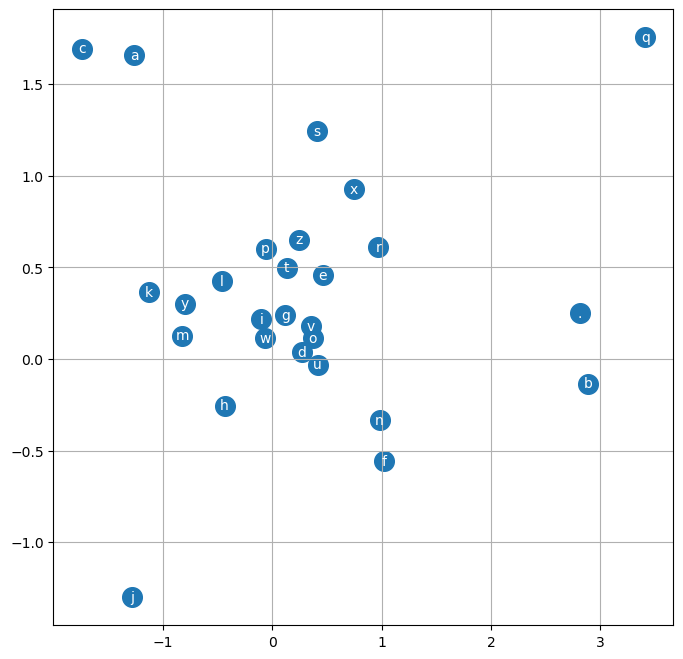

In [242]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), default_itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [43]:
# Test set
emb = C[xs_test]
h = torch.tanh(emb.view(-1 , block_size*embeding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, ys_test)
loss

tensor(2.2411, grad_fn=<NllLossBackward0>)

In [54]:
#predictions

g = torch.Generator().manual_seed(2147483647+10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)]    
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        prob = F.softmax(logits, dim=1)
        #prob = torch.randn(27).abs() # can uncoment this to show untrained output
        ix = torch.multinomial(prob, num_samples=1, replacement=True).item()
        out.append(default_itos[ix])
        context = context[1:] + [ix]
        if ix == 0:
            break
    print(''.join(out))

ramja.
sha.
shambhu.
janen.
anwar.
istahurvesh.
parantikaasurjeety.
aagayal.
nit.
nikban.
moti.
shan.
dilsin.
gand.
nin.
faijaypand.
raj.
rak.
udma.
puneet.
